<a href="https://colab.research.google.com/github/dathrika13/cs666student/blob/main/CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

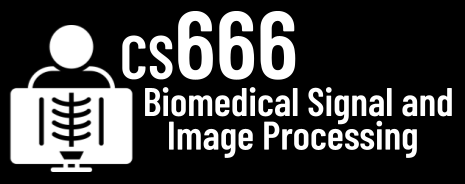
#Assignment 2

In [54]:
### TODO: SAICHARITHA DATHRIKA

In [55]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [56]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [58]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [59]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: 60 EEG Channels

raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [60]:
# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER

fs= raw.info['sfreq']
print(fs,'Hz')  

600.614990234375 Hz


In [61]:
raw

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

In [62]:
# TODO What is the total duration of the measurement?
# TODO:  4 minutes 38 seconds

**Task 2:** Let's look at some channels! [20 Points]

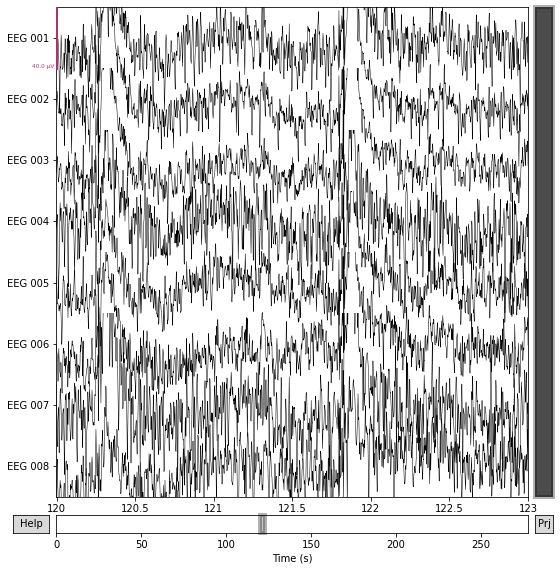

In [63]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [64]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

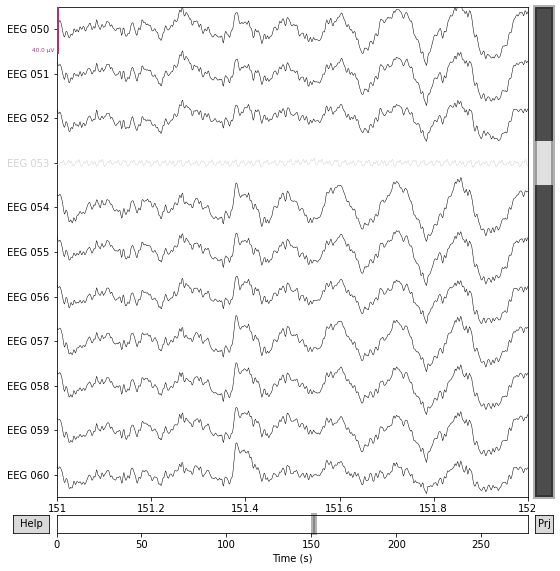

In [65]:
chs50to60 = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs1 = [raw.ch_names.index(ch) for ch in chs50to60]
eeg50to60 = raw.plot(order=chan_idxs1, start=151, duration=1)

In [66]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO: YES, IT IS EEG 053

In [67]:
raw.info['bads']

['MEG 2443', 'EEG 053']

**Task 3:** How long between event and brain activity? [25 Points]

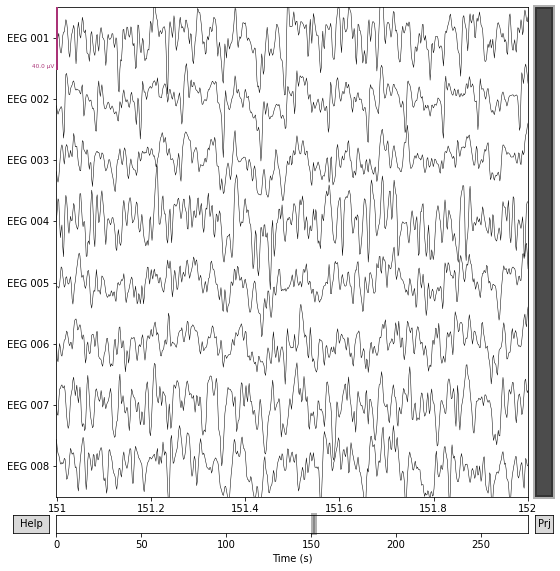

In [68]:
# the following code plots the stimulus channel for the same time
chan_idxs2 = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [69]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

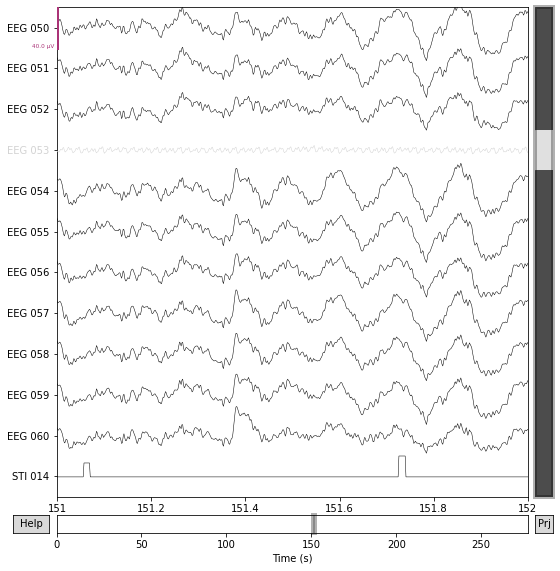

In [48]:
combined = raw.plot(order=chan_idxs1+chan_idxs2, start=151, duration=1)

In [70]:
# TODO How many stimulus events do you observe?
# TODO: YOUR_ANSWER
# We can observe two stimulus events in the given time frame.

In [71]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# First stimulus activity takes from 151.056 sec to 151.070 sec. 
# and the brain activity response is recorded at 151.3
# the time between first stimulus and brain activity is roughly 244 ms 

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [72]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


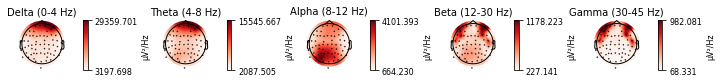

In [73]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


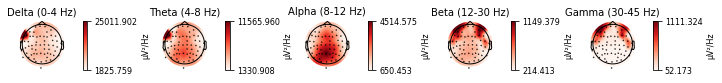

In [74]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [75]:
# TODO Please visualize the average brain activity when the subject pushes the button

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


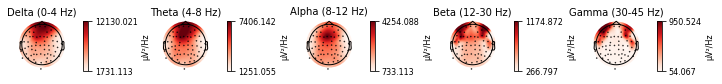

In [76]:
button_activity = epochs['button'].plot_psd_topomap()

In [77]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

- By observing the three event activities, we can see distinct patterns of brain activity.
- Beta and Gamma waves have the same effect on all events.
- Alpha waves have an impact on the brain's back region during visual/right and face events, and geater activity in the frontal region during button events.
- Delta and Theta waves have different effects on the brain across the three events, for example, the front part of the brain is more active during the Visual/right event.
- During the face event, the left corner of the brain is active.
- During the button event, the front part of the brain is active across all frequency bands.

These results help us understand how the brain works during different activities and show us that certain types of brain waves have specific jobs in controlling brain activity.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [78]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

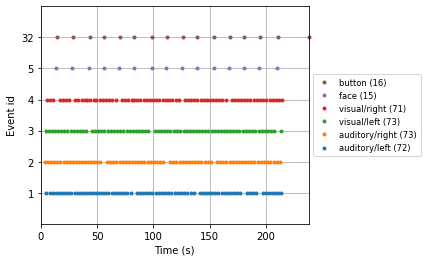

In [79]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

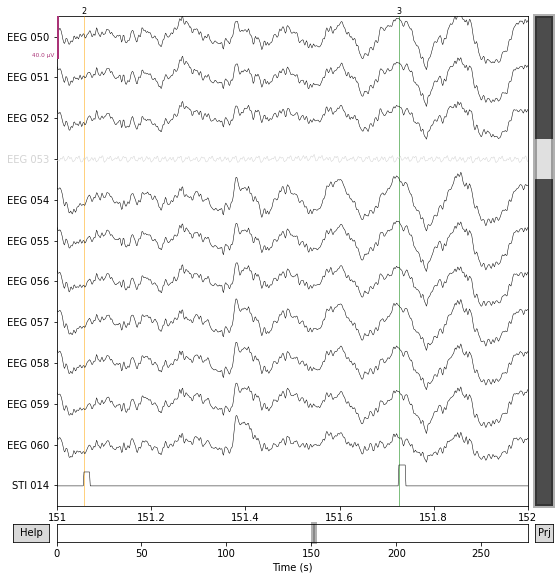

In [80]:
ecolor = {1 : 'blue', 2 : 'orange', 3 : 'green', 4 : 'red', 5 : 'voilet', 32 : 'brown'}
ch_activity = raw.plot(order = chan_idxs1+chan_idxs2, start = 151, duration = 1, events = events, event_color = ecolor)
     

we can see in the given time frame we can observe two stimulus activities takes place which indicate auditory/right and visual/left events can be seen.

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#